In [573]:
import numpy as np
import importlib
import fem_radial
from scipy.sparse.linalg import eigsh
from scipy.linalg import eigh
import matplotlib.pyplot as plt

importlib.reload(fem_radial)
from fem_radial import *

In [574]:
xs = np.linspace(0, 1, 500)
xs = np.exp(1.1 * xs) - 1
xs /= xs[-1] * 1e9
fem = FemRadial(xs)

In [575]:
block_k = fem.get_block_K()
block_V = fem.get_block_V()
block_M = fem.get_block_M()

In [576]:
K = fem.assemble_matrix(block_k)
V = fem.assemble_matrix(block_V)
M = fem.assemble_matrix(block_M)

In [577]:
val, vec = eigsh((K + V)[:-2, :-2], 3, M[:-2, :-2], which="LA", sigma=-1e-10)
# val, vec = eigsh((K + V)[:-1, :-1], 1, M[:-1, :-1], which="SA")

In [578]:
print(vec.shape)
print(xs.shape)

(499, 3)
(500,)


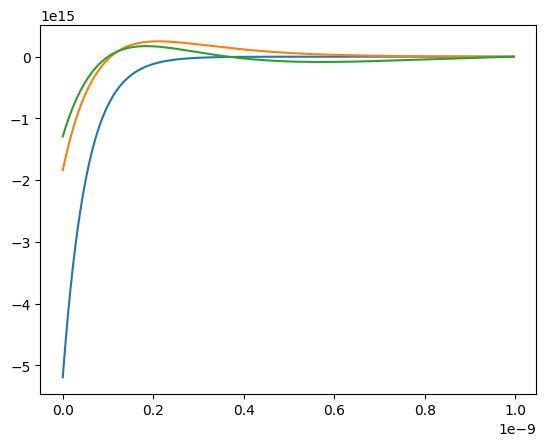

In [579]:
fig, ax = plt.subplots()
ax.plot(xs[:-1], vec)

In [580]:
val

array([-2.17976232e-18, -5.44808746e-19, -2.06733709e-19])

In [581]:
electron_volt = 1.602176634e-19
val / electron_volt

array([-13.60500632,  -3.40042873,  -1.29033032])